## Advertising Sales Channel Prediction
Sales Channel Prediction Case Study

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.keys()

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
pd.isnull(df).sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

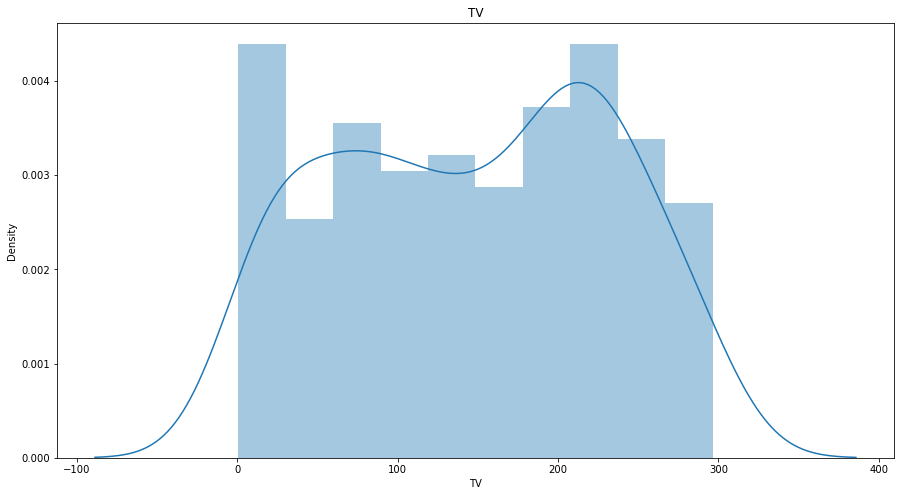

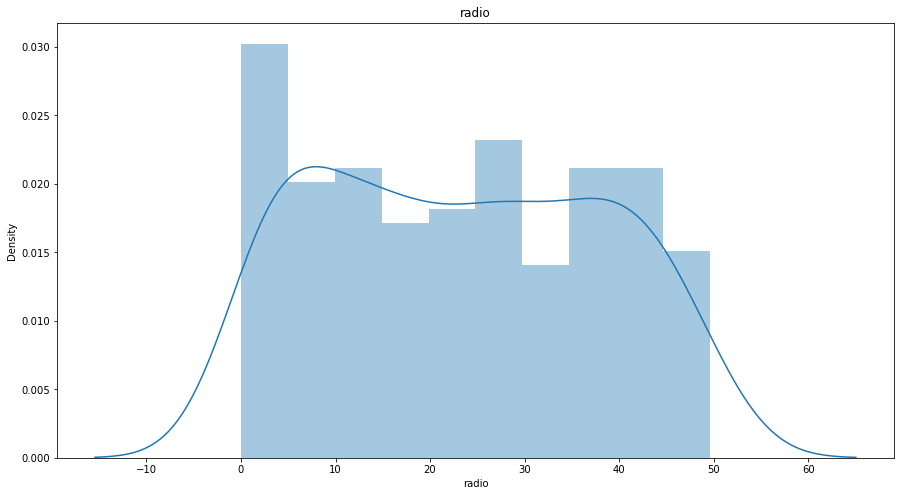

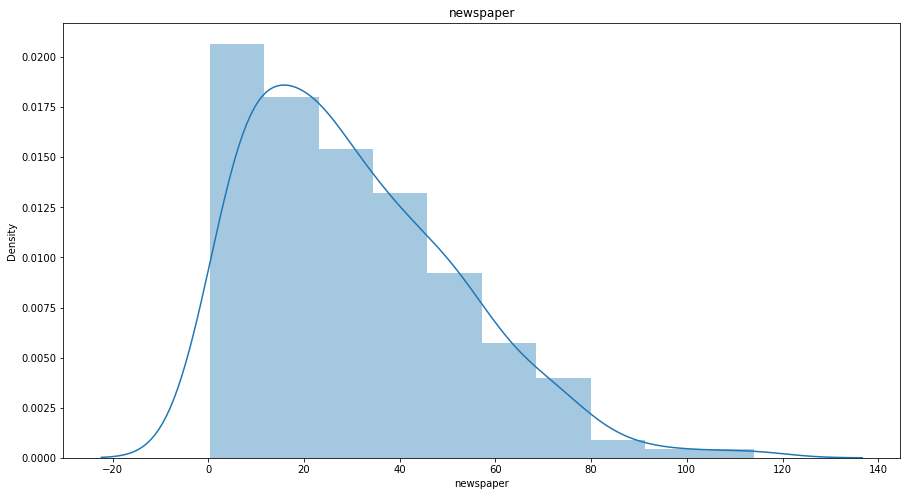

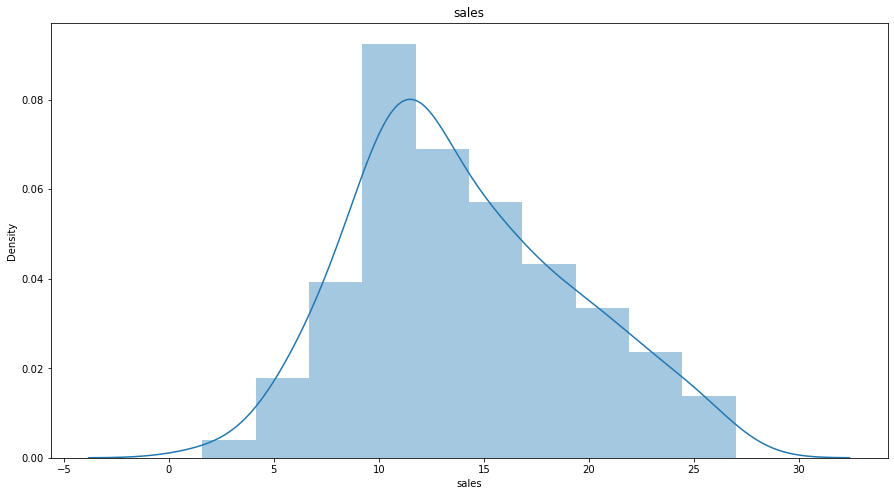

In [9]:
for i in df.columns[1:]:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    sns.distplot(df[i], bins = 10)
    plt.title(i)
    plt.show()

Observations from graphs:

The TV and radio graphs are more evenly spread

The newspaper graph experiences a steep decline, implying not much money is spent on advertising through newspaper

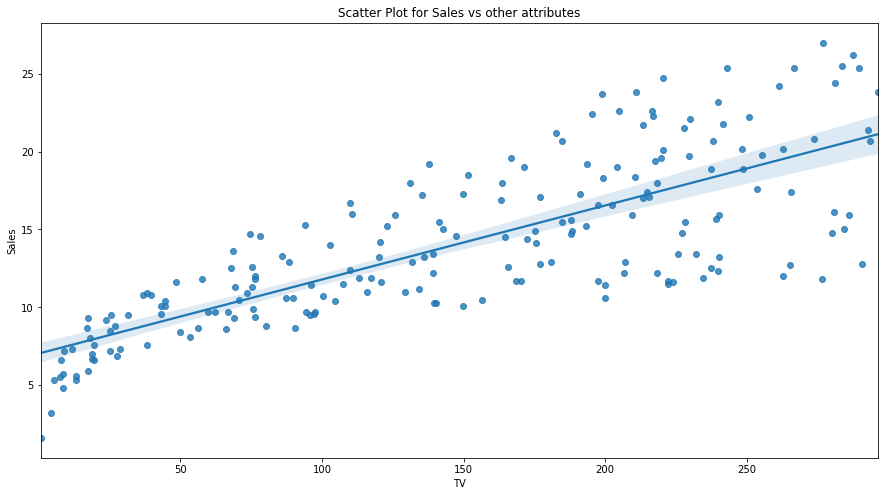

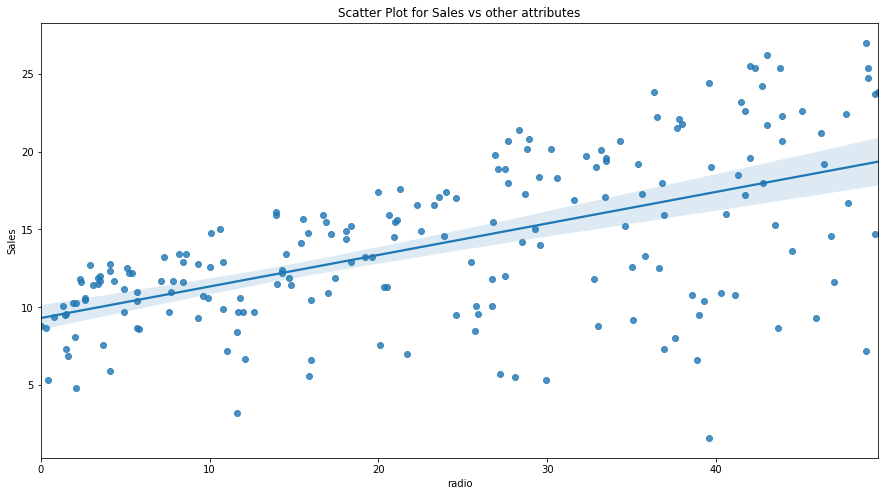

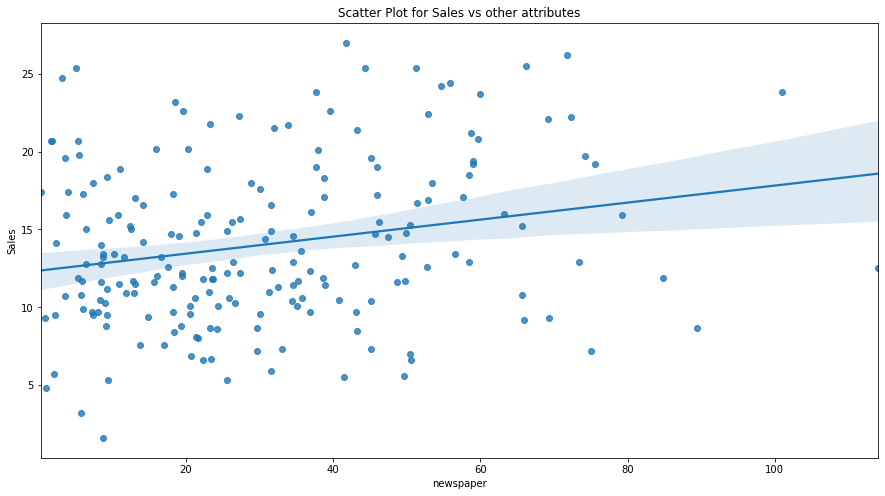

In [10]:
for i in df.columns[1:-1]:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    sns.regplot(df[i], df['sales'])
    plt.title('Scatter Plot for Sales vs other attributes')
    plt.xlabel(i)
    plt.ylabel('Sales')
    plt.show()

Observations from the graphs:

There is a linear relation between TV and sales

There is somewhat linear relation between radio and sales but the graph is more spread

There doesn't seem to be a linear relation between sales and newspaper as graph is very spread.

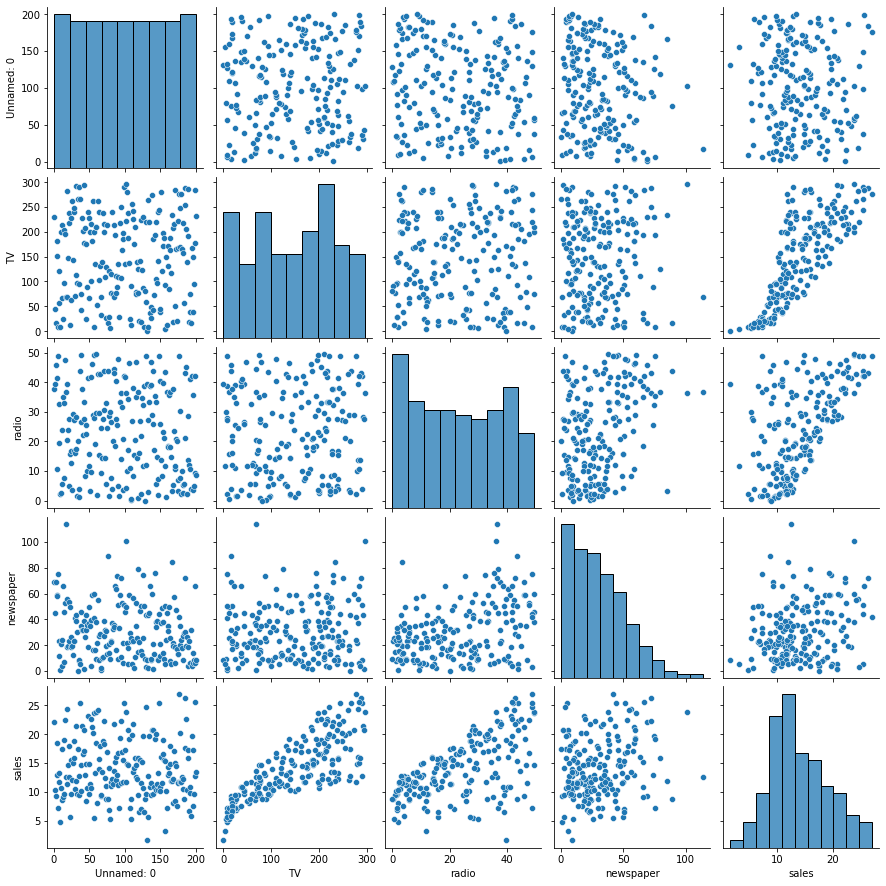

In [11]:
sns.pairplot(df)

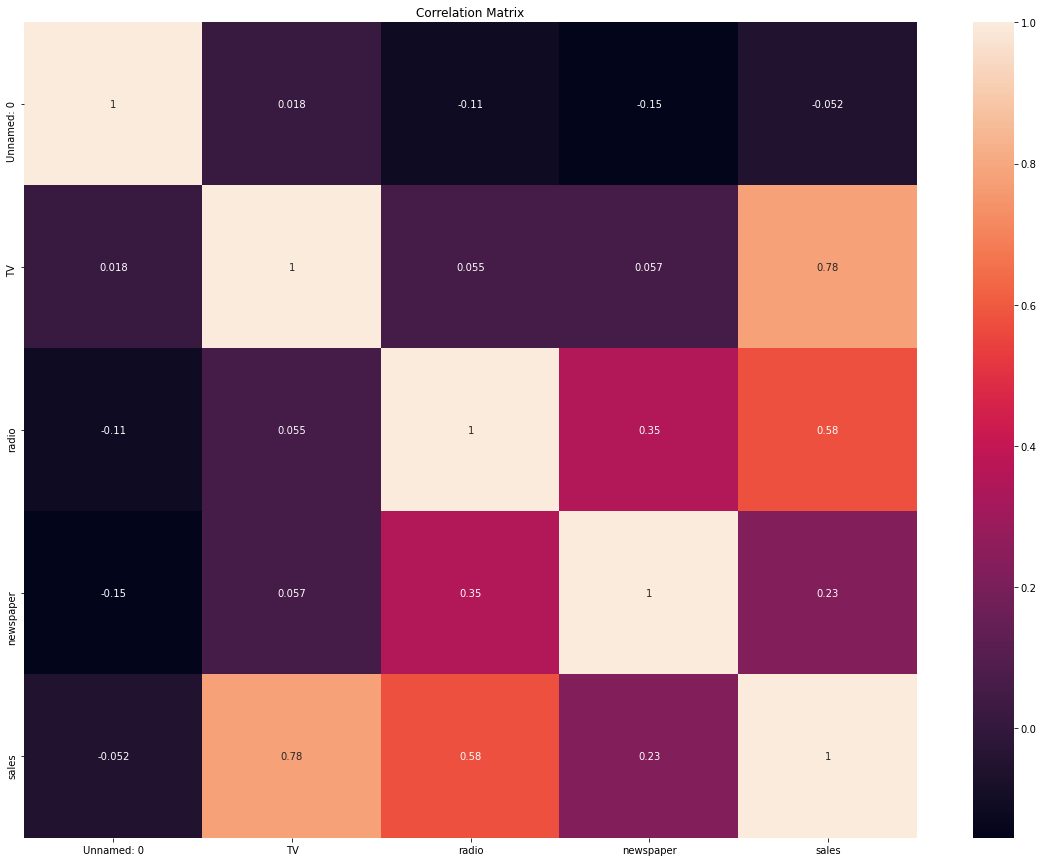

In [12]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

Observations from heatmap:

As we can see from the heatmap, TV has highest correlation with sales with 0.78.

Radio is also highly correlated with sales with 0.58.

Newspaper has the lowest correlation with sales at 0.23, less than half the correlation sales have with radio.

TV has very low correlation with other two columns (radio and newspaper) at 0.055 and 0.057 respectively.

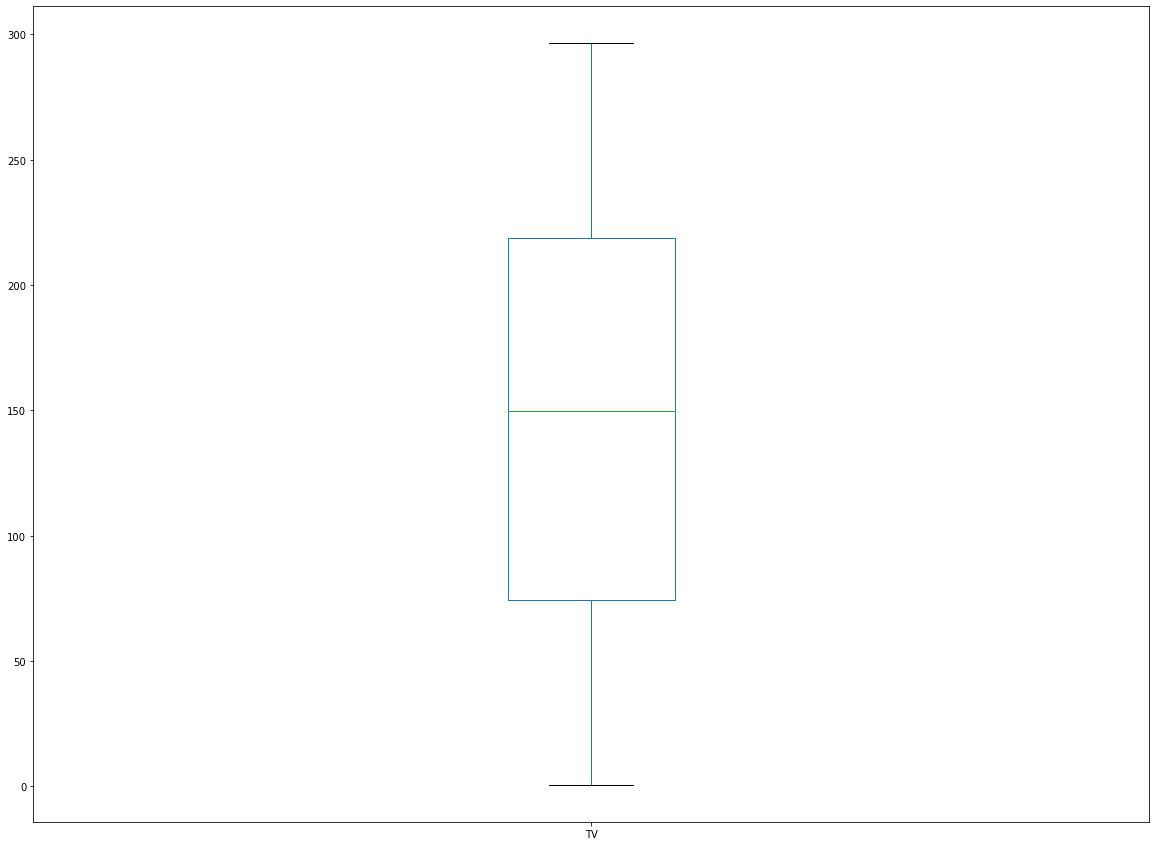

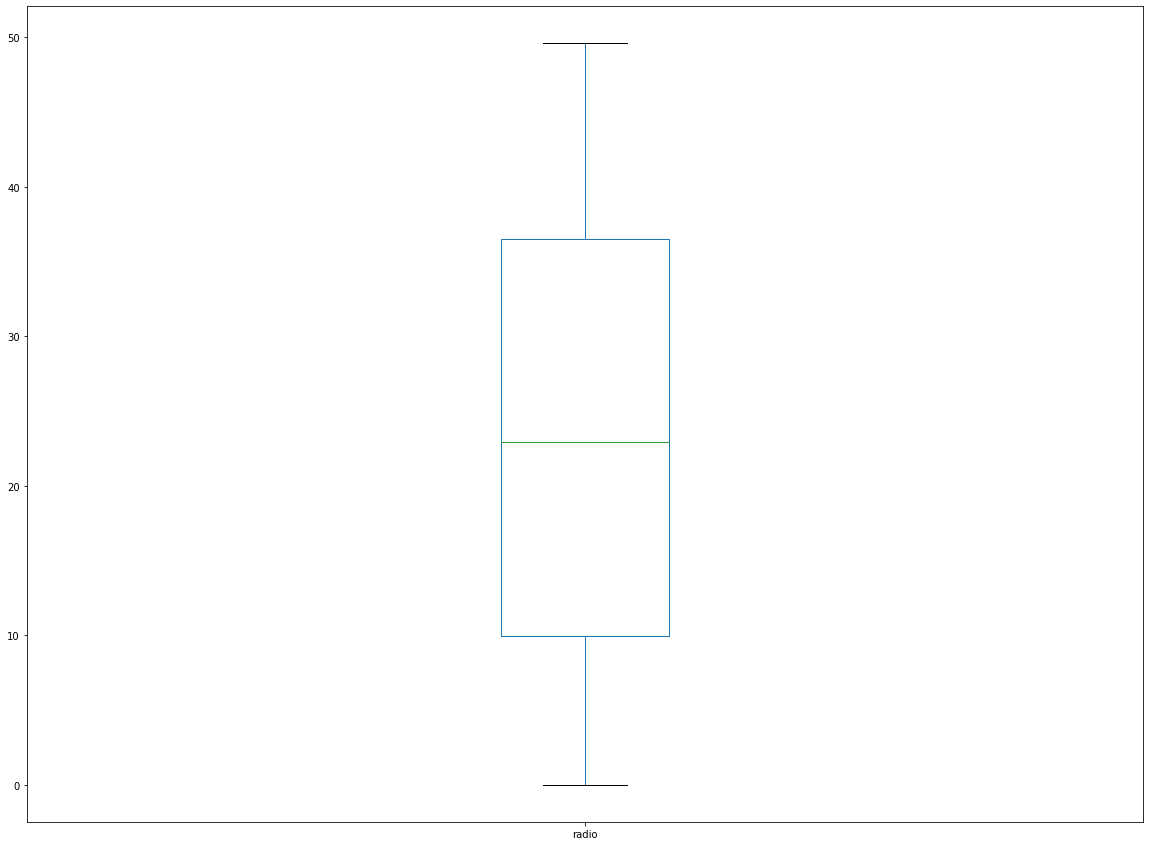

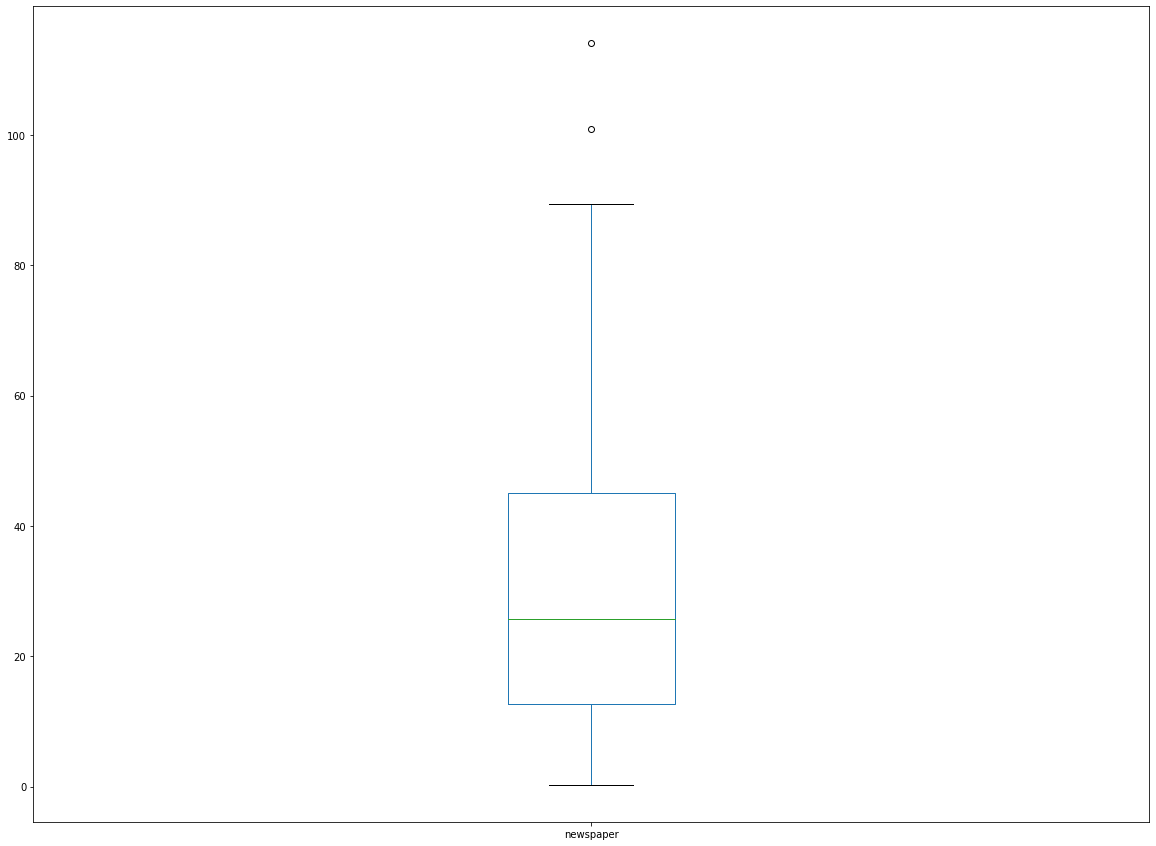

In [13]:
for i in df.columns[1:-1]:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

There are no outliers in TV and radio.

As for newspaper there are only 2 outliers which can be ignored.

In [14]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

In [15]:
df['newspaper']=np.log(df['newspaper'])

In [16]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper    -1.181239
sales         0.407571
dtype: float64

## Model Fitting and Predicting

In [17]:
from sklearn.model_selection import train_test_split         #for splitting dataset into train and test
from sklearn.metrics import r2_score                         #for model evaluation
from sklearn.metrics import mean_squared_error               #for model evaluation
from sklearn.linear_model import LinearRegression            #regression model
from sklearn.tree import DecisionTreeRegressor               #regression model
from sklearn.ensemble import RandomForestRegressor           #regression model
from sklearn.model_selection import cross_val_score          #for cross validating model

In [18]:
feature = ['TV', 'radio', 'newspaper']
x = df[feature]
y = df['sales']

In [19]:
maxr2score = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    r2 = r2_score(y_test, predrf)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.9397819633783066 on Random State 154


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 154)

In [21]:
LR = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

models = [LR, dt, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (r2_score(y_test, pred))
    print (mean_squared_error(y_test, pred))

LinearRegression()
0.9397819633783066
1.8810206063400778
DecisionTreeRegressor()
0.9646304278096218
1.1048333333333333
RandomForestRegressor()
0.9853943894044592
0.4562329833333331


In [22]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LinearRegression()  model is : 0.8880462922246707
 
Cross Validation Score for  DecisionTreeRegressor()  model is : 0.9515851077807451
 
Cross Validation Score for  RandomForestRegressor()  model is : 0.9752310945090089
 


## Hypertuning

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor()>

In [25]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [26]:
GCV = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [27]:
rfr = RandomForestRegressor(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='mae')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))
print (mean_squared_error(y_test, predrfr))

0.9851011526946598
0.4653927687500075


In [28]:
cvs = cross_val_score(rfr, x, y, cv = 5)
print ('Cross Validation Score for Random forest model after hypertuning is :', cvs.mean())

Cross Validation Score for Random forest model after hypertuning is : 0.9764919808148196


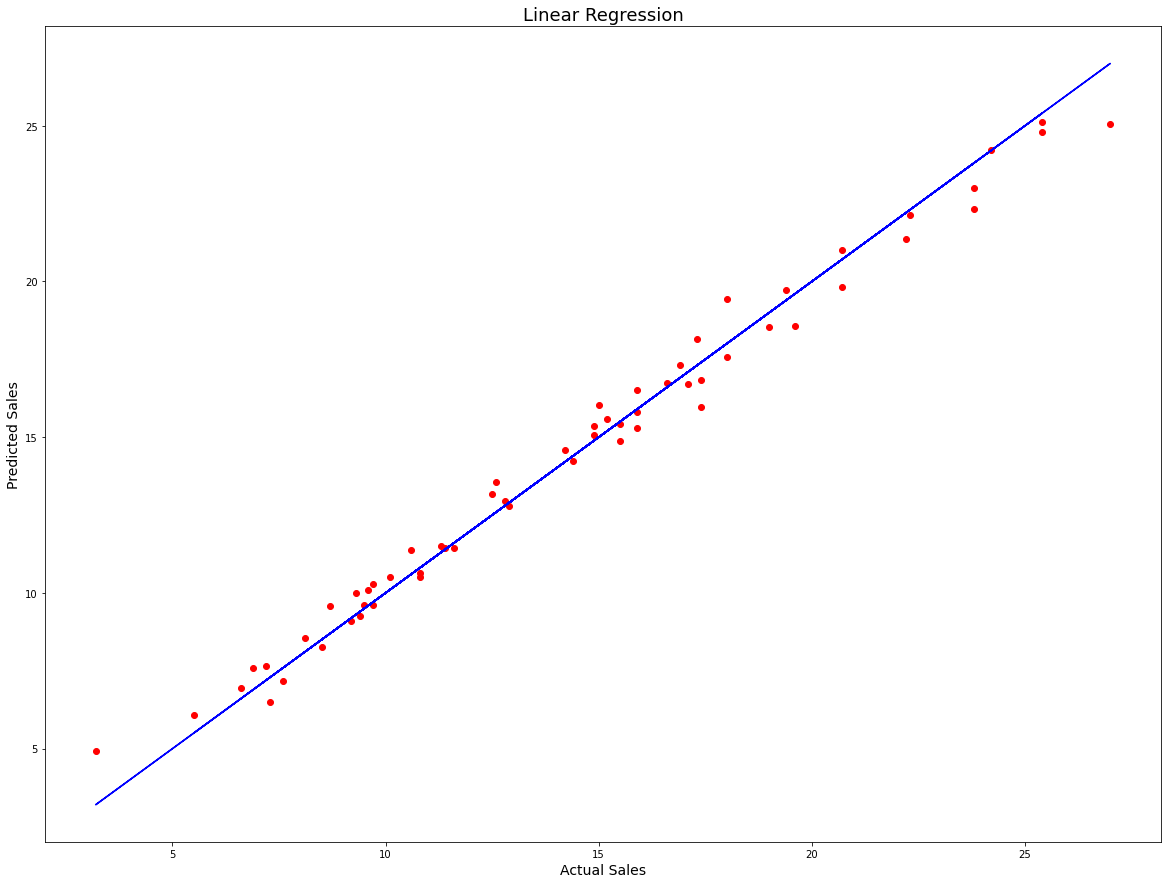

In [29]:
plt.figure(figsize = (20, 15))
plt.scatter(x = y_test, y = predrfr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Sales', fontsize = 14)
plt.ylabel('Predicted Sales', fontsize = 14)
plt.title('Linear Regression', fontsize = 18)
plt.show()

The blue line represents the actual values while the red dotes are the predicted values

In [30]:
import pickle

filename = 'AdvertisingRfr.pkl'
pickle.dump(rfr, open(filename, 'wb'))

## Conclusion

In [31]:
loaded_model = pickle.load(open('AdvertisingRfr.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print (result)

0.9851011526946598


In [32]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], predrfr[:]], index = ['Predicted', 'Original'])

In [33]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,15.6005,10.50725,4.92325,22.993,9.57125,17.3325,19.7295,22.335,7.5885,15.2945,...,21.352,15.34825,6.93325,12.96775,15.80875,15.9705,25.10475,21.01075,14.2375,13.171
Original,15.6005,10.50725,4.92325,22.993,9.57125,17.3325,19.7295,22.335,7.5885,15.2945,...,21.352,15.34825,6.93325,12.96775,15.80875,15.9705,25.10475,21.01075,14.2375,13.171
